### **Proyecto Contratos del Estado**

---


**Problemática:**

Ausencia de la divulgación de los datos relacionados a los contratos gestionados por las UOCC durante el período 2018 hasta la fecha.

**Objetivos**

*   Contabilizar la cantidad de UOCC existentes y el valor de los contratos que precisan por período.

*   Determinar la cantidad de MIPYMES representativas por período.
*   Averiguar las UOCC que más gastan.

*   Mostrar al público la segregación existente por los distintos tipos de servicios


*   Predecir el número de proveedores que reinciden en la suministración de bienes , servicios u obras para el 2024









# **EDA - FASE DE LIMPIEZA**

Importación de librerías

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Carga del conjunto de datos

In [234]:
df=pd.read_csv("/content/drive/MyDrive/contratos.csv")

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486059 entries, 0 to 486058
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CODIGO_UNIDAD_COMPRA         486059 non-null  int64  
 1   UNIDAD_COMPRA                486059 non-null  object 
 2   CODIGO_PROCESO               486059 non-null  object 
 3   CODIGO_CONTRATO              486059 non-null  object 
 4   MODALIDAD                    486059 non-null  object 
 5   ESTADO_PROCESO               486059 non-null  object 
 6   ESTADO_CONTRATO              486059 non-null  object 
 7   CARATULA                     486059 non-null  object 
 8   MONEDA                       486059 non-null  object 
 9   VALOR_CONTRATADO             486059 non-null  float64
 10  FECHA_CREACION_CONTRATO      486059 non-null  object 
 11  FECHA_ADJUDICACION           486059 non-null  object 
 12  FECHA_FIRMA_CONTRATO         486059 non-null  object 
 13 

Como se observa rapidamente en este dataset no hay datos nulos o vacíos pero eso no significa que todos los datos sean válidos ,
por lo tanto vamos a observar aquellas columnas con subniveles 1

---



In [236]:
unique_counts = df.nunique()
print(unique_counts)

CODIGO_UNIDAD_COMPRA              519
UNIDAD_COMPRA                     519
CODIGO_PROCESO                 374228
CODIGO_CONTRATO                486059
MODALIDAD                           9
ESTADO_PROCESO                      5
ESTADO_CONTRATO                    10
CARATULA                       320429
MONEDA                              3
VALOR_CONTRATADO               190564
FECHA_CREACION_CONTRATO        460484
FECHA_ADJUDICACION             377080
FECHA_FIRMA_CONTRATO           483214
FECHA_INICIO_CONTRATO           70053
FECHA_FIN_CONTRATO              53879
RPE                             26404
RAZON_SOCIAL                    26404
GENERO                              2
NUMERO_DOCUMENTO                26404
TIPO_DOCUMENTO                      4
TIPO_PERSONA                        3
CLASIFICACION_RPE                   9
ES_MIPYME                           2
CERTIFICACION_MICM                  2
CLASIFICACION_EMPRESARIAL           5
CLASIFICACION_EMPRESARIAL_2         4
MUNICIPIO   

No hay columnas con subniveles 1 , por lo tanto vamos a ver si aquellas columnas que tienen pocos subniveles tienen valores que estén mal estructurados

---



In [237]:
# Especificamos las columnas de interés
columnas_investigar = [
    'MACROREGION', 'OBJETO_CONTRATO', 'CLASIFICACION_EMPRESARIAL_2',
    'CLASIFICACION_EMPRESARIAL', 'TIPO_PERSONA', 'ESTADO_PROCESO', 'MONEDA'
]

# Obtenemos los valores únicos para cada columna especificada
unique_values = {column: df[column].unique() for column in columnas_investigar}

# Imprimimos los resultados
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}")
    print()  # Línea en blanco para separar cada columna

Columna: MACROREGION
Valores únicos: ['SURESTE' 'No Especificada' 'NORTE' 'SUROESTE']

Columna: OBJETO_CONTRATO
Valores únicos: ['Bienes' 'Servicios' 'NO DISPONIBLE' 'Obras']

Columna: CLASIFICACION_EMPRESARIAL_2
Valores únicos: ['Empresa no acogida a la Ley 187-17' 'MIPYME Certificada'
 'Persona física' 'Gran empresa']

Columna: CLASIFICACION_EMPRESARIAL
Valores únicos: ['No clasificada' 'Micro Empresa' 'Pequeña Empresa' 'Mediana Empresa'
 'Gran empresa']

Columna: TIPO_PERSONA
Valores únicos: ['Persona Jurídica' 'Persona Natural' 'NO DISPONIBLE']

Columna: ESTADO_PROCESO
Valores únicos: ['Proceso adjudicado y celebrado' 'Sobres abiertos o aperturados'
 'Proceso publicado' 'Proceso con etapa cerrada' 'Suspendido']

Columna: MONEDA
Valores únicos: ['DOP' 'USD' 'EUR']



Ahora observando esto vamos a indagar un poco mas si aquellas columnas que no estan disponibles o clasificadas , representan un gran porcentaje del total de datos o si los datos en euros o dolares estan presentes en muchos registros para determinar el tratamiento de dichos datos

---



In [238]:
# Contamos los valores 'NO DISPONIBLE' en la columna 'OBJETO_CONTRATO' (segunda columna)
no_disponible_objeto_contrato = (df['OBJETO_CONTRATO'] == 'NO DISPONIBLE').sum()

# Contamos los valores 'No clasificada' en la columna 'CLASIFICACION_EMPRESARIAL' (cuarta columna)
no_clasificada_clasificacion_empresarial = (df['CLASIFICACION_EMPRESARIAL'] == 'No clasificada').sum()

# Contamos los valores 'NO DISPONIBLE' en la columna 'TIPO_PERSONA' (quinta columna)
no_disponible_tipo_persona = (df['TIPO_PERSONA'] == 'NO DISPONIBLE').sum()

# Contamos los valores 'USD' y 'EUR' en la columna 'MONEDA' (séptima columna)
usd_moneda = (df['MONEDA'] == 'USD').sum()
eur_moneda = (df['MONEDA'] == 'EUR').sum()

# Imprimimos los resultados
print(f"Valores 'NO DISPONIBLE' en 'OBJETO_CONTRATO': {no_disponible_objeto_contrato}")
print(f"Valores 'No clasificada' en 'CLASIFICACION_EMPRESARIAL': {no_clasificada_clasificacion_empresarial}")
print(f"Valores 'NO DISPONIBLE' en 'TIPO_PERSONA': {no_disponible_tipo_persona}")
print(f"Valores 'USD' en 'MONEDA': {usd_moneda}")
print(f"Valores 'EUR' en 'MONEDA': {eur_moneda}")


Valores 'NO DISPONIBLE' en 'OBJETO_CONTRATO': 8549
Valores 'No clasificada' en 'CLASIFICACION_EMPRESARIAL': 246214
Valores 'NO DISPONIBLE' en 'TIPO_PERSONA': 1
Valores 'USD' en 'MONEDA': 45
Valores 'EUR' en 'MONEDA': 16


Descartamos el registro en tipo de persona ya que solo es 1 , clasificacion empresarial tiene demasiados datos no clasificados por lo que tenemos que dejarlo asi ya que no podemos hacer promedio , el objeto de contrato tambien lo podemos quitar al no representar ni un 2% del total y aunque los recuentos en moneda sean infimos vamos a calcular su representacion en monto y ahi veremos si tambien los eliminamos

---



In [239]:
# Suma total de la columna 'VALOR_CONTRATADO'
total_valor_contratado = df['VALOR_CONTRATADO'].sum()

# Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'USD'
usd_valor_contratado = df[df['MONEDA'] == 'USD']['VALOR_CONTRATADO'].sum()

# Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'EUR'
eur_valor_contratado = df[df['MONEDA'] == 'EUR']['VALOR_CONTRATADO'].sum()

# Imprimimos los resultados
print(f"Suma total de 'VALOR_CONTRATADO': {total_valor_contratado}")
print(f"Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'USD': {usd_valor_contratado}")
print(f"Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'EUR': {eur_valor_contratado}")


Suma total de 'VALOR_CONTRATADO': 3390436687054.0
Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'USD': 206049105.0
Suma de 'VALOR_CONTRATADO' cuando 'MONEDA' es 'EUR': 263016756.0


Tal y como observamos tampoco son representativos asi que vamos a ajustar el dataset limpiando esas partes , ademas de eliminar columnas que no nos ofrecen ningun valor para resolver la problematica tal y como observamos rapidamente con head y tambien poner los valores de las distintas columnas geograficas en minusculas para aumentar la coherencia de la data

---




In [240]:
# Guardamos el número de filas antes de borrar
initial_rows = df.shape[0]

# Borramos las filas donde MONEDA es igual a USD o EUR
df = df[~df['MONEDA'].isin(['USD', 'EUR'])]

# Borramos las filas donde TIPO_PERSONA es igual a NO DISPONIBLE
df = df[df['TIPO_PERSONA'] != 'NO DISPONIBLE']

# Borramos las filas donde OBJETO_CONTRATO es igual a NO DISPONIBLE
df = df[df['OBJETO_CONTRATO'] != 'NO DISPONIBLE']

# Guardamos el número de filas después de borrar
final_rows = df.shape[0]

# Calculamos el número de filas borradas
rows_deleted = initial_rows - final_rows

# Imprimimos el número de filas borradas
print(f"Número de filas borradas: {rows_deleted}")

Número de filas borradas: 8599


In [241]:
# Especificamos las columnas que queremos convertir a minúsculas
columns_to_lower = ['MUNICIPIO', 'PROVINCIA', 'REGION', 'MACROREGION']

# Convertimos los valores de las columnas especificadas a minúsculas
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())

In [242]:
df = df.drop('URL_CONTRATO', axis=1)

Por ultimo en nuestra fase de limpieza , cambiamos los tipos de datos que nos interesen , como por ejemplo asegurarnos que los codigos de unidades de compras sean string para las futuras manipulaciones facilitarlas, tambien guardar todo el dataset limpio en otra nomenclatura

---



In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477460 entries, 0 to 486058
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CODIGO_UNIDAD_COMPRA         477460 non-null  int64  
 1   UNIDAD_COMPRA                477460 non-null  object 
 2   CODIGO_PROCESO               477460 non-null  object 
 3   CODIGO_CONTRATO              477460 non-null  object 
 4   MODALIDAD                    477460 non-null  object 
 5   ESTADO_PROCESO               477460 non-null  object 
 6   ESTADO_CONTRATO              477460 non-null  object 
 7   CARATULA                     477460 non-null  object 
 8   MONEDA                       477460 non-null  object 
 9   VALOR_CONTRATADO             477460 non-null  float64
 10  FECHA_CREACION_CONTRATO      477460 non-null  object 
 11  FECHA_ADJUDICACION           477460 non-null  object 
 12  FECHA_FIRMA_CONTRATO         477460 non-null  object 
 13  FECH

In [244]:
# Convertir las columnas CODIGO_UNIDAD_COMPRA y RPE a tipo string
df['CODIGO_UNIDAD_COMPRA'] = df['CODIGO_UNIDAD_COMPRA'].astype(str)
df['RPE'] = df['RPE'].astype(str)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477460 entries, 0 to 486058
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CODIGO_UNIDAD_COMPRA         477460 non-null  object 
 1   UNIDAD_COMPRA                477460 non-null  object 
 2   CODIGO_PROCESO               477460 non-null  object 
 3   CODIGO_CONTRATO              477460 non-null  object 
 4   MODALIDAD                    477460 non-null  object 
 5   ESTADO_PROCESO               477460 non-null  object 
 6   ESTADO_CONTRATO              477460 non-null  object 
 7   CARATULA                     477460 non-null  object 
 8   MONEDA                       477460 non-null  object 
 9   VALOR_CONTRATADO             477460 non-null  float64
 10  FECHA_CREACION_CONTRATO      477460 non-null  object 
 11  FECHA_ADJUDICACION           477460 non-null  object 
 12  FECHA_FIRMA_CONTRATO         477460 non-null  object 
 13  FECH

In [246]:
# Guardar el DataFrame en un archivo CSV llamado dataset_limpio.csv
df.to_csv('dataset_limpio.csv', index=False)

# **EDA - FASE DE ANÁLISIS**

---



Ahora con la información limpia voy a proceder a buscar insights en funcion de mis necesidades , como por ejemplo la representación de mypimes, la evolución temporal respecto al peso de los contratos, nacionalmente que zonas son las mas proveedoras , etc

---



In [247]:
dl = pd.read_csv('dataset_limpio.csv')

In [248]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477460 entries, 0 to 477459
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CODIGO_UNIDAD_COMPRA         477460 non-null  int64  
 1   UNIDAD_COMPRA                477460 non-null  object 
 2   CODIGO_PROCESO               477460 non-null  object 
 3   CODIGO_CONTRATO              477460 non-null  object 
 4   MODALIDAD                    477460 non-null  object 
 5   ESTADO_PROCESO               477460 non-null  object 
 6   ESTADO_CONTRATO              477460 non-null  object 
 7   CARATULA                     477460 non-null  object 
 8   MONEDA                       477460 non-null  object 
 9   VALOR_CONTRATADO             477460 non-null  float64
 10  FECHA_CREACION_CONTRATO      477460 non-null  object 
 11  FECHA_ADJUDICACION           477460 non-null  object 
 12  FECHA_FIRMA_CONTRATO         477460 non-null  object 
 13 

In [249]:
dl['FECHA_ADJUDICACION'] = pd.to_datetime(dl['FECHA_ADJUDICACION'])


# Diccionario para almacenar los valores únicos de cada año
unique_codigo_unidad_compra_count_por_anio = {}

# Iterar sobre cada año desde 2004 hasta 2024
for year in range(2018, 2024 + 1):
    # Filtrar los registros donde el año de FECHA_ADJUDICACION es el año actual del bucle
    filtered_dl = dl[dl['FECHA_ADJUDICACION'].dt.year == year]
    # Obtener los valores únicos de CODIGO_UNIDAD_COMPRA para ese año
    unique_values = filtered_dl['CODIGO_UNIDAD_COMPRA'].unique()
    # Contar los valores únicos y almacenarlos en el diccionario
    unique_codigo_unidad_compra_count_por_anio[year] = len(unique_values)

# Imprimir la cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para cada año
for year, unique_count in unique_codigo_unidad_compra_count_por_anio.items():
    print(f"Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año {year}: {unique_count}")

Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2018: 211
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2019: 273
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2020: 300
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2021: 337
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2022: 400
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2023: 394
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2024: 367


Vamos a graficarlo para asimilarlo mejor

---



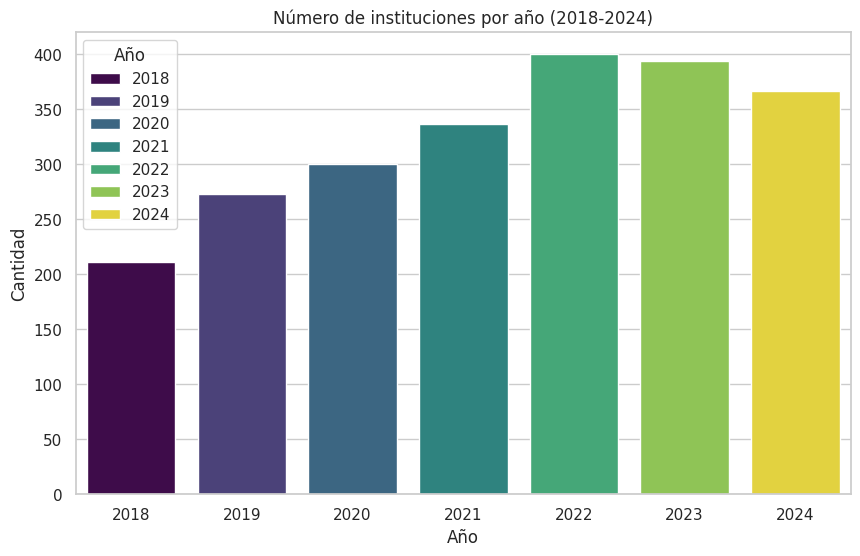

In [250]:
# Convertir el diccionario en un DataFrame
dl_counts = pd.DataFrame(list(unique_codigo_unidad_compra_count_por_anio.items()), columns=['Año', 'Cantidad'])

# Crear el gráfico con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Cantidad', data=dl_counts, palette='viridis' , hue='Año')

# Añadir etiquetas y título

plt.title('Número de instituciones por año (2018-2024)')

# Mostrar el gráfico
plt.show()

Se observa un crecimiento constante en el numero de instituciones participantes en los contratos desde 2018 hasta 2022 y ha empezado a decrecer lentamente estos dos ultimos años, veamos ahora los montos pertenecientes a dichos años y ademas que tipo de empresa los compone

---



In [251]:
# Diccionario para almacenar los valores únicos de cada año con ES_MIPYME == 'Si'
unique_codigo_unidad_compra_count_por_anio_si = {}

# Iterar sobre cada año desde 2018 hasta 2024
for year in range(2018, 2024 + 1):
    # Filtrar los registros donde el año de FECHA_ADJUDICACION es el año actual del bucle y ES_MIPYME es 'Si'
    filtered_dl = dl[(dl['FECHA_ADJUDICACION'].dt.year == year) & (dl['ES_MIPYME'] == 'Si')]
    # Obtener los valores únicos de CODIGO_UNIDAD_COMPRA para ese año y contarlos
    unique_values = filtered_dl['CODIGO_UNIDAD_COMPRA'].nunique()
    # Almacenar el recuento en el diccionario
    unique_codigo_unidad_compra_count_por_anio_si[year] = unique_values

# Imprimir la cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para cada año donde ES_MIPYME == 'Si'
for year, unique_count in unique_codigo_unidad_compra_count_por_anio_si.items():
    print(f"Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año {year} con ES_MIPYME == 'Si': {unique_count}")

Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2018 con ES_MIPYME == 'Si': 202
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2019 con ES_MIPYME == 'Si': 267
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2020 con ES_MIPYME == 'Si': 291
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2021 con ES_MIPYME == 'Si': 320
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2022 con ES_MIPYME == 'Si': 380
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2023 con ES_MIPYME == 'Si': 374
Cantidad de valores únicos de CODIGO_UNIDAD_COMPRA para el año 2024 con ES_MIPYME == 'Si': 359


Los porcentajes de participación de MIMPYMES son muy altos sin bajar nunca del 94% pero en el ultimo año estan en ascenso incluso sin haber sido completado por lo que demuestra que ha habido incentivos que benefician el convertirse en MIPYMES

---



In [252]:
porcentaje_mipymes_2018 = (202 / 211) * 100
porcentaje_mipymes_2019 = (267 / 273) * 100
porcentaje_mipymes_2020 = (291 / 300) * 100
porcentaje_mipymes_2021 = (320 / 337) * 100
porcentaje_mipymes_2022 = (380 / 400) * 100
porcentaje_mipymes_2023 = (374 / 394) * 100
porcentaje_mipymes_2024 = (359 / 367) * 100


# Imprimir el resultado
print(f"Porcentaje de MYPYMES en 2018: {porcentaje_mipymes_2018}%")
print(f"Porcentaje de MYPYMES en 2019: {porcentaje_mipymes_2019}%")
print(f"Porcentaje de MYPYMES en 2020: {porcentaje_mipymes_2020}%")
print(f"Porcentaje de MYPYMES en 2021: {porcentaje_mipymes_2021}%")
print(f"Porcentaje de MYPYMES en 2022: {porcentaje_mipymes_2022}%")
print(f"Porcentaje de MYPYMES en 2023: {porcentaje_mipymes_2023}%")
print(f"Porcentaje de MYPYMES en 2024: {porcentaje_mipymes_2024}%")



Porcentaje de MYPYMES en 2018: 95.73459715639811%
Porcentaje de MYPYMES en 2019: 97.8021978021978%
Porcentaje de MYPYMES en 2020: 97.0%
Porcentaje de MYPYMES en 2021: 94.95548961424333%
Porcentaje de MYPYMES en 2022: 95.0%
Porcentaje de MYPYMES en 2023: 94.9238578680203%
Porcentaje de MYPYMES en 2024: 97.82016348773843%


In [253]:
# Filtrar los datos según las condiciones especificadas
dl_filtered = dl[(dl['ESTADO_PROCESO'] != 'Suspendido') & (~dl['ESTADO_CONTRATO'].isin(['Rescindido', 'Suspendido']))]

# Agrupar por año y sumar el valor contratado
valor_contratado_por_anio = dl_filtered.groupby(dl_filtered['FECHA_ADJUDICACION'].dt.year)['VALOR_CONTRATADO'].sum()

# Formatear el valor contratado para hacerlo más legible
valor_contratado_por_anio = valor_contratado_por_anio.apply(lambda x: f'{x:,.2f}')

# Imprimir el valor contratado por año
print("Valor contratado por año")
print(valor_contratado_por_anio)

Valor contratado por año
FECHA_ADJUDICACION
2018       72,933,185,400.00
2019      121,194,366,827.00
2020      114,357,644,426.00
2021      144,800,237,582.00
2022    2,282,702,338,501.00
2023      245,157,027,625.00
2024       96,350,271,535.00
Name: VALOR_CONTRATADO, dtype: object


Exceptuando el 2022 que fue un año totalmente con cifras estratosféricas , el 2023 a diferencia del resto aumento la adquisición a pesar de tener menos cantidad de unidades de compra asi que seria excelente poder esperar a final de este año para ver si sigue esa tendencia y determinados que las instituciones presentes cada vez son mas propensas a gastar más.

---



Vamos a ver mas desgloses de estos datos

---




<ipython-input-254-4b47b3acd6ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_filtered['Año'] = dl_filtered['FECHA_ADJUDICACION'].dt.year


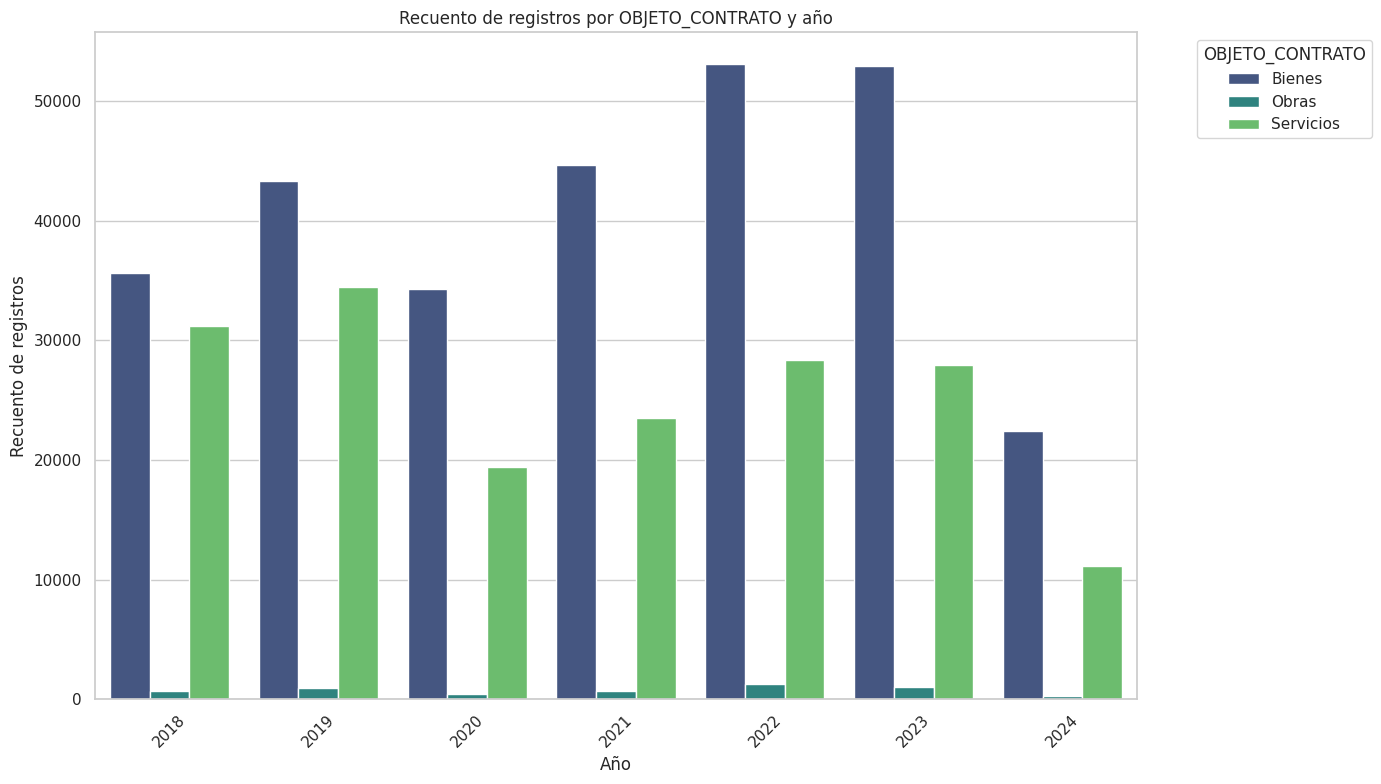

In [254]:
# Extraer el año de FECHA_ADJUDICACION y almacenarlo en una nueva columna 'Año'
dl_filtered['Año'] = dl_filtered['FECHA_ADJUDICACION'].dt.year

# Obtener el recuento de registros por año y por OBJETO_CONTRATO
recuento_por_anio_y_objeto = dl_filtered.groupby(['Año', 'OBJETO_CONTRATO']).size().reset_index(name='Cuenta')

# Graficar el recuento de registros por OBJETO_CONTRATO y por año
plt.figure(figsize=(14, 8))
sns.barplot(data=recuento_por_anio_y_objeto, x='Año', y='Cuenta', hue='OBJETO_CONTRATO', palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Recuento de registros')
plt.title('Recuento de registros por OBJETO_CONTRATO y año')

# Mejorar la visualización de las leyendas y las etiquetas
plt.legend(title='OBJETO_CONTRATO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se ve un crecimiento positivo y constante en cuanto a la adquisición de bienes , las obras nunca son muy representativas pero en este ultimo año es incluso menor que la media y los servicios si que tienen un leve aumento desde 2020

---



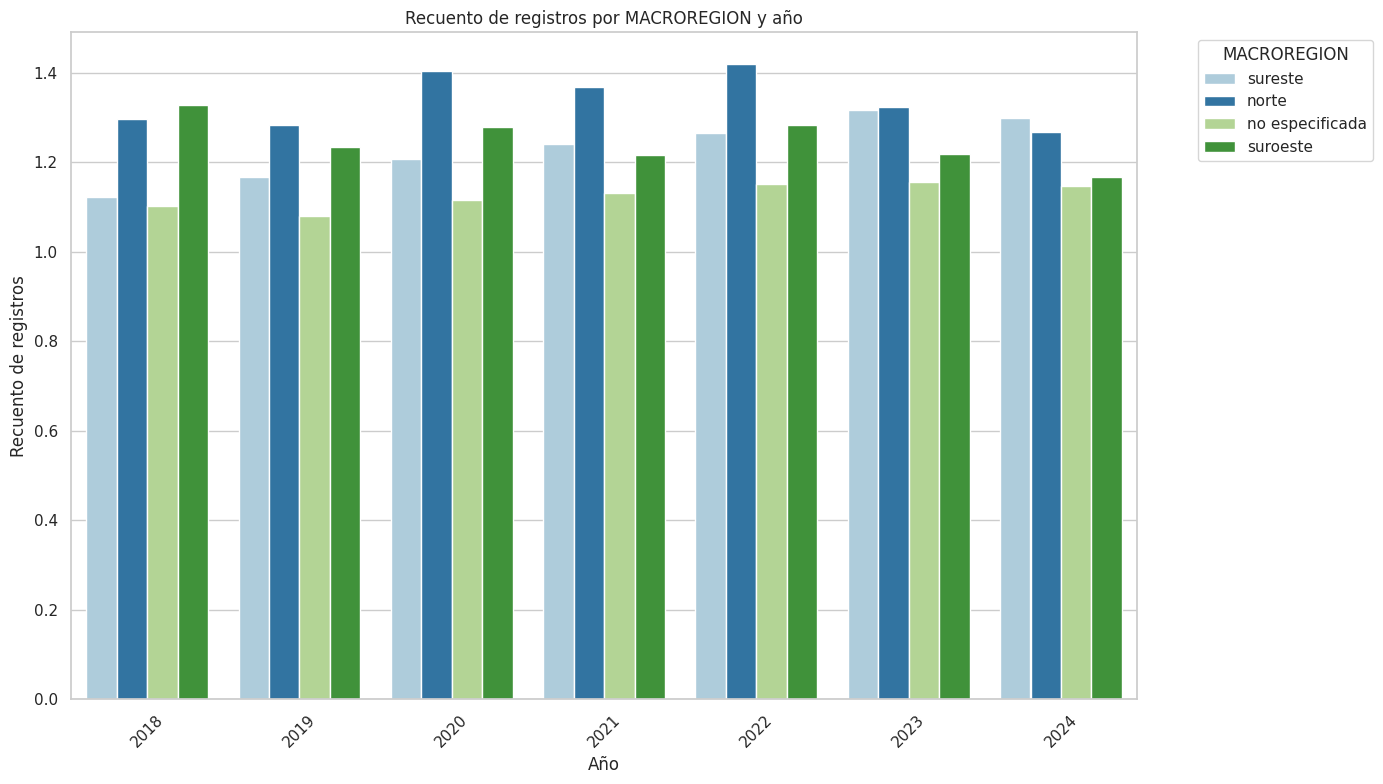

In [255]:
# Calcular el recuento de registros por año y por MACROREGION
recuento_por_anio_macroregion = dl_filtered.groupby(['FECHA_ADJUDICACION', 'MACROREGION']).size().reset_index(name='Cuenta')

# Obtener el año de FECHA_ADJUDICACION y almacenarlo en una nueva columna 'Año'
recuento_por_anio_macroregion['Año'] = recuento_por_anio_macroregion['FECHA_ADJUDICACION'].dt.year

# Definir una paleta de colores más distintiva
colores_macroregion = sns.color_palette('Paired', n_colors=len(recuento_por_anio_macroregion['MACROREGION'].unique()))

# Graficar el recuento de registros por MACROREGION y por año
plt.figure(figsize=(14, 8))
sns.barplot(data=recuento_por_anio_macroregion, x='Año', y='Cuenta', hue='MACROREGION', palette=colores_macroregion,errorbar=None)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Recuento de registros')
plt.title('Recuento de registros por MACROREGION y año')

# Mejorar la visualización de las leyendas y las etiquetas
plt.legend(title='MACROREGION', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Al haber muchos datos No especificados no puedo segregar mas , ya que si vamos a otros subniveles no abarcariamos bien visualmente la informacion pero lo que si es determinante es la predominancia tanto de la macroregión Norte como de la Sureste

---



Para tener un insight mas veamos que 5 instituciones son las que mas adquieren bienes y servicios por año

---



Aqui lo veremos en función del valor contratado

---



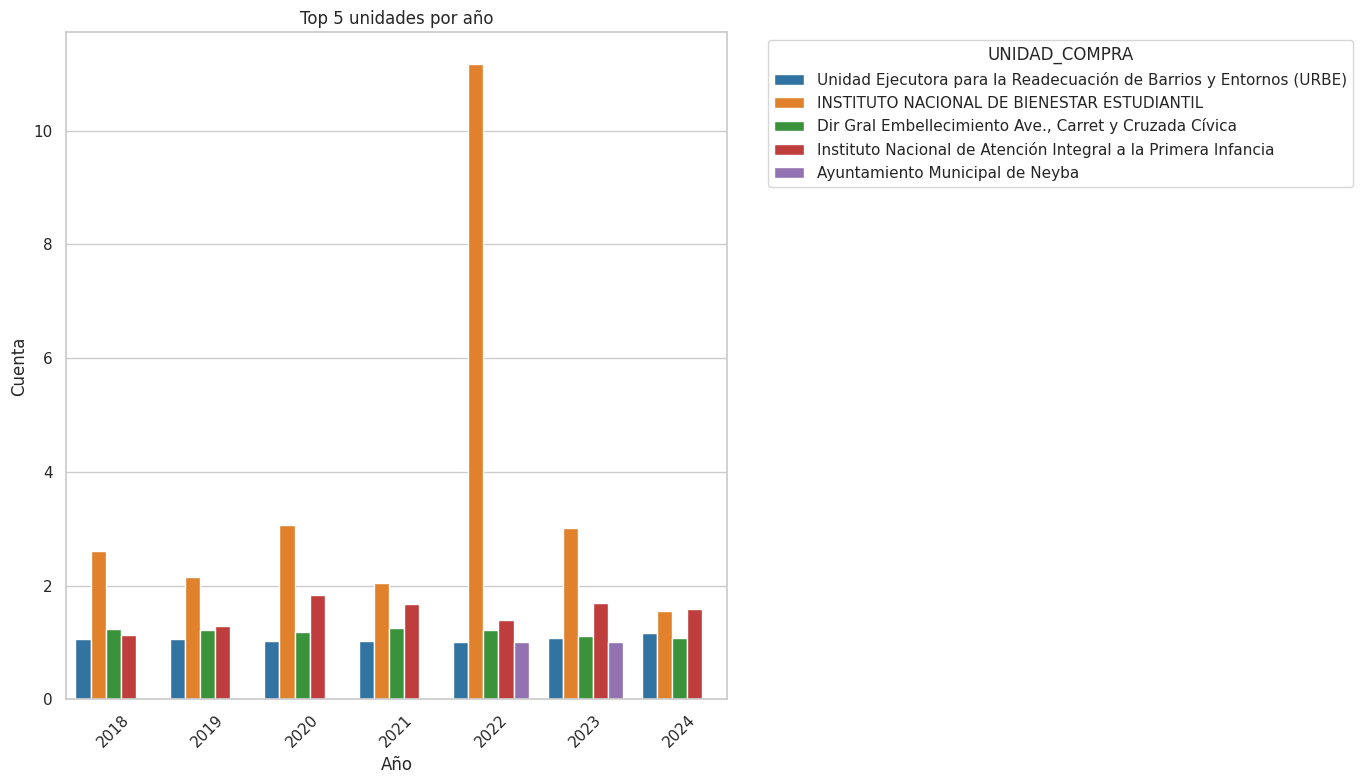

In [256]:
# Filtrar los datos según las condiciones especificadas
dl_filtered = dl[(dl['ESTADO_PROCESO'] != 'Suspendido') & (~dl['ESTADO_CONTRATO'].isin(['Rescindido', 'Suspendido']))]

# Ordenar por VALOR_CONTRATADO en orden descendente y seleccionar las 5 primeras unidades de compra
top_unidades_compra = dl_filtered.sort_values(by='VALOR_CONTRATADO', ascending=False).head(5)['UNIDAD_COMPRA'].tolist()

# Filtrar nuevamente por las top 5 unidades de compra
dl_filtered_top = dl_filtered[dl_filtered['UNIDAD_COMPRA'].isin(top_unidades_compra)]

# Calcular el recuento de registros por año y por UNIDAD_COMPRA
recuento_por_anio_unidad_compra = dl_filtered_top.groupby(['FECHA_ADJUDICACION', 'UNIDAD_COMPRA']).size().reset_index(name='Cuenta')

# Obtener el año de FECHA_ADJUDICACION y almacenarlo en una nueva columna 'Año'
recuento_por_anio_unidad_compra['Año'] = recuento_por_anio_unidad_compra['FECHA_ADJUDICACION'].dt.year

# Definir una paleta de colores más diferenciada
colores_unidad_compra = sns.color_palette('tab10', n_colors=len(recuento_por_anio_unidad_compra['UNIDAD_COMPRA'].unique()))

# Graficar el recuento de registros por UNIDAD_COMPRA y por año
plt.figure(figsize=(14, 8))
sns.barplot(data=recuento_por_anio_unidad_compra, x='Año', y='Cuenta', hue='UNIDAD_COMPRA', palette=colores_unidad_compra, errorbar=None)

# Añadir etiquetas y título

plt.title('Top 5 unidades por año')

# Mejorar la visualización de las leyendas y las etiquetas
plt.legend(title='UNIDAD_COMPRA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# PREDICCIÓN

Aqui cargamos de nuevo en otro dataframe el dataset de los contratos limpio ya

---



In [257]:
nd = pd.read_csv("/content/dataset_limpio.csv")

In [258]:
nd['CODIGO_UNIDAD_COMPRA'] = nd['CODIGO_UNIDAD_COMPRA'].astype(str)
nd['RPE'] = nd['RPE'].astype(str)


In [259]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477460 entries, 0 to 477459
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CODIGO_UNIDAD_COMPRA         477460 non-null  object 
 1   UNIDAD_COMPRA                477460 non-null  object 
 2   CODIGO_PROCESO               477460 non-null  object 
 3   CODIGO_CONTRATO              477460 non-null  object 
 4   MODALIDAD                    477460 non-null  object 
 5   ESTADO_PROCESO               477460 non-null  object 
 6   ESTADO_CONTRATO              477460 non-null  object 
 7   CARATULA                     477460 non-null  object 
 8   MONEDA                       477460 non-null  object 
 9   VALOR_CONTRATADO             477460 non-null  float64
 10  FECHA_CREACION_CONTRATO      477460 non-null  object 
 11  FECHA_ADJUDICACION           477460 non-null  object 
 12  FECHA_FIRMA_CONTRATO         477460 non-null  object 
 13 

Y ahora cargamos el dataset de proveedores para poder realizar la predicción que deseamos desde el planteamiento del problema

---



In [260]:
pro = pd.read_csv("/content/proveedores (1).csv")

In [261]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119990 entries, 0 to 119989
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   RPE                          119990 non-null  int64 
 1   RAZON_SOCIAL                 119990 non-null  object
 2   GENERO                       119990 non-null  object
 3   NUMERO_DOCUMENTO             119989 non-null  object
 4   TIPO_DOCUMENTO               119990 non-null  object
 5   TIPO_PERSONA                 119988 non-null  object
 6   FECHA_REGISTRO               119891 non-null  object
 7   ESTADO_RPE                   119990 non-null  object
 8   CLASIFICACION_RPE            70352 non-null   object
 9   ES_MIPYME                    119990 non-null  object
 10  CLASIFICACION_EMPRESARIAL    119990 non-null  object
 11  CLASIFICACION_EMPRESARIAL_2  119990 non-null  object
 12  TELEFONO_COMERCIAL           119909 non-null  object
 13  DIRECCION     

In [262]:
pro.head()

,RPE,RAZON_SOCIAL,GENERO,NUMERO_DOCUMENTO,TIPO_DOCUMENTO,TIPO_PERSONA,FECHA_REGISTRO,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,CLASIFICACION_EMPRESARIAL,CLASIFICACION_EMPRESARIAL_2,TELEFONO_COMERCIAL,DIRECCION,MUNICIPIO,PROVINCIA,REGION,MACROREGION,PAIS
0,46256,CAMARA MINERA DEL PERU,Femenino,20548128847,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-14 17:14:00,Activo,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,051-652-6449,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN
1,45955,"KAPLAN, INC",Masculino,2049341,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-02 16:51:00,Activo,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,809-472-1111,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN
2,43548,MR DO BRASIL INDUSTRIA MECANICA LTDA,Masculino,43.966.092/0001-71,Clave Tributaria País Extranjero,Persona Jurídica,2014-07-08 21:38:00,Desactualizado,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,11-4785-2157,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN
3,42749,CESAR MIGUEL VASQUEZ CAMACHO,Masculino,40220069591,Cédula,Persona Natural,2014-06-06 08:00:00,Activo,Micro empresa,Si,Micro Empresa,MIPYME Certificada,809-421-9091,NaN,SANTO DOMINGO OESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA
4,41695,"SUPMACON 4G, SRL",Masculino,131129862,RNC,Persona Jurídica,2014-04-30 08:00:00,Desactualizado,Pequeña empresa,Si,Pequeña Empresa,MIPYME Certificada,849-289-6953,NaN,SANTO DOMINGO ESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA


In [265]:
nd['FECHA_ADJUDICACION'] = pd.to_datetime(nd['FECHA_ADJUDICACION'])
nd['Año'] = nd['FECHA_ADJUDICACION'].dt.year

In [266]:

nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477460 entries, 0 to 477459
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CODIGO_UNIDAD_COMPRA         477460 non-null  object        
 1   UNIDAD_COMPRA                477460 non-null  object        
 2   CODIGO_PROCESO               477460 non-null  object        
 3   CODIGO_CONTRATO              477460 non-null  object        
 4   MODALIDAD                    477460 non-null  object        
 5   ESTADO_PROCESO               477460 non-null  object        
 6   ESTADO_CONTRATO              477460 non-null  object        
 7   CARATULA                     477460 non-null  object        
 8   MONEDA                       477460 non-null  object        
 9   VALOR_CONTRATADO             477460 non-null  float64       
 10  FECHA_CREACION_CONTRATO      477460 non-null  object        
 11  FECHA_ADJUDICACION        

Vamos a usar variables para almacenar temporalmente todos los registros que pertenezcan al año 2023 , más tarde se hara lo mismo para el período 2018-2022 , con el fin de mezclar los datasets y poder en un mismo conjunto de datos saber que proveedores tuvieron adjudicaciones en dichos años y basarnos también en esas nuevas variables para predecir con nuestro modelo

---



In [267]:
# Filtrar el DataFrame 'nd' para obtener solo las filas donde la columna 'Año' es igual a 2023
nd2023 = nd[nd['Año'] == 2023]


In [268]:
nd2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83458 entries, 169606 to 280616
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CODIGO_UNIDAD_COMPRA         83458 non-null  object        
 1   UNIDAD_COMPRA                83458 non-null  object        
 2   CODIGO_PROCESO               83458 non-null  object        
 3   CODIGO_CONTRATO              83458 non-null  object        
 4   MODALIDAD                    83458 non-null  object        
 5   ESTADO_PROCESO               83458 non-null  object        
 6   ESTADO_CONTRATO              83458 non-null  object        
 7   CARATULA                     83458 non-null  object        
 8   MONEDA                       83458 non-null  object        
 9   VALOR_CONTRATADO             83458 non-null  float64       
 10  FECHA_CREACION_CONTRATO      83458 non-null  object        
 11  FECHA_ADJUDICACION           83458 non-n

Combinación del dataset 2023 y proveedores

---



In [269]:
# Combinar los DataFrames a través de la columna 'RAZON_SOCIAL'
Conjunto = pd.merge(nd2023, pro, on='RAZON_SOCIAL', how='inner')


In [270]:
Conjunto.head()

,CODIGO_UNIDAD_COMPRA,UNIDAD_COMPRA,CODIGO_PROCESO,CODIGO_CONTRATO,MODALIDAD,ESTADO_PROCESO,ESTADO_CONTRATO,CARATULA,MONEDA,VALOR_CONTRATADO,...,ES_MIPYME_y,CLASIFICACION_EMPRESARIAL_y,CLASIFICACION_EMPRESARIAL_2_y,TELEFONO_COMERCIAL,DIRECCION,MUNICIPIO_y,PROVINCIA_y,REGION_y,MACROREGION_y,PAIS
0,155,Dirección General de Promoción de las Comunida...,PRODUCCION CUNARIA-DAF-CM-2023-0002,PRODUCCION CUNARIA-2023-00002,Compras Menores,Proceso adjudicado y celebrado,Cerrado,"Adquisición de Materia Prima, para ser utiliza...",DOP,1175925.0,...,Si,Mediana Empresa,MIPYME Certificada,809-621-5826,"Calle 25 Este, Esquina Yolanda Guzman, 39-B, E...",DISTRITO NACIONAL,DISTRITO NACIONAL,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA
1,151,Hospital Ramón de Lara FFAA,HOSP RAMON DE LARA-DAF-CM-2023-0001,HOSP RAMON DE LARA-2023-00021,Compras Menores,Proceso adjudicado y celebrado,Flujo en aprobación,Solicitud tubos de acero y banderas,DOP,176213.0,...,Si,Mediana Empresa,MIPYME Certificada,809-621-5826,"Calle 25 Este, Esquina Yolanda Guzman, 39-B, E...",DISTRITO NACIONAL,DISTRITO NACIONAL,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA
2,554,Junta de Aviación Civil,JAC-UC-CD-2023-0013,JAC-2023-00011,Compras por Debajo del Umbral,Proceso adjudicado y celebrado,Cerrado,Desechables,DOP,161577.0,...,Si,Mediana Empresa,MIPYME Certificada,809-621-5826,"Calle 25 Este, Esquina Yolanda Guzman, 39-B, E...",DISTRITO NACIONAL,DISTRITO NACIONAL,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA
3,1037,Hospital Docente Padre Billini,HDPB-UC-CD-2023-0020,HDPB-2023-00030,Compras por Debajo del Umbral,Proceso adjudicado y celebrado,Cerrado,"ADQUISICIÓN DE CARNETS, PORTA CARTNETS Y LANYA...",DOP,34220.0,...,Si,Mediana Empresa,MIPYME Certificada,809-621-5826,"Calle 25 Este, Esquina Yolanda Guzman, 39-B, E...",DISTRITO NACIONAL,DISTRITO NACIONAL,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA
4,551,Cuerpo Especializado de la Seguridad del Metro...,SEGURIDAD DEL METRO-UC-CD-2023-0008,SEGURIDAD DEL METRO-2023-00012,Compras por Debajo del Umbral,Proceso adjudicado y celebrado,Cerrado,"ADQUISICION DE TINTAS, CAJAS WHITE, PORTA CARN...",DOP,188772.0,...,Si,Mediana Empresa,MIPYME Certificada,809-621-5826,"Calle 25 Este, Esquina Yolanda Guzman, 39-B, E...",DISTRITO NACIONAL,DISTRITO NACIONAL,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA


In [271]:
conjuntolimpio =  Conjunto.loc[:, ['CODIGO_UNIDAD_COMPRA', 'UNIDAD_COMPRA', 'CODIGO_PROCESO', 'CODIGO_CONTRATO', 'ESTADO_PROCESO', 'OBJETO_CONTRATO','ESTADO_CONTRATO' ,'ES_MIPYME_x', 'TIPO_PERSONA_x','Año','GENERO_x','ESTADO_RPE','CLASIFICACION_RPE_y','RAZON_SOCIAL','MACROREGION_y']]


In [272]:
conjuntolimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80150 entries, 0 to 80149
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CODIGO_UNIDAD_COMPRA  80150 non-null  object
 1   UNIDAD_COMPRA         80150 non-null  object
 2   CODIGO_PROCESO        80150 non-null  object
 3   CODIGO_CONTRATO       80150 non-null  object
 4   ESTADO_PROCESO        80150 non-null  object
 5   OBJETO_CONTRATO       80150 non-null  object
 6   ESTADO_CONTRATO       80150 non-null  object
 7   ES_MIPYME_x           80150 non-null  object
 8   TIPO_PERSONA_x        80150 non-null  object
 9   Año                   80150 non-null  int32 
 10  GENERO_x              80150 non-null  object
 11  ESTADO_RPE            80150 non-null  object
 12  CLASIFICACION_RPE_y   72639 non-null  object
 13  RAZON_SOCIAL          80150 non-null  object
 14  MACROREGION_y         80150 non-null  object
dtypes: int32(1), object(14)
memory usage

Filtración de datos del nuevo dataset que solo contenga registros de procesos y contratos no fallidos

---



In [273]:
Conjunto_limpio2 = conjuntolimpio[
    (conjuntolimpio['ESTADO_PROCESO'] != 'Suspendido') &
    (~conjuntolimpio['ESTADO_CONTRATO'].isin(['Suspendido', 'Rescindido']))]

In [274]:
Conjunto_limpio2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78554 entries, 0 to 80149
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CODIGO_UNIDAD_COMPRA  78554 non-null  object
 1   UNIDAD_COMPRA         78554 non-null  object
 2   CODIGO_PROCESO        78554 non-null  object
 3   CODIGO_CONTRATO       78554 non-null  object
 4   ESTADO_PROCESO        78554 non-null  object
 5   OBJETO_CONTRATO       78554 non-null  object
 6   ESTADO_CONTRATO       78554 non-null  object
 7   ES_MIPYME_x           78554 non-null  object
 8   TIPO_PERSONA_x        78554 non-null  object
 9   Año                   78554 non-null  int32 
 10  GENERO_x              78554 non-null  object
 11  ESTADO_RPE            78554 non-null  object
 12  CLASIFICACION_RPE_y   71155 non-null  object
 13  RAZON_SOCIAL          78554 non-null  object
 14  MACROREGION_y         78554 non-null  object
dtypes: int32(1), object(14)
memory usage: 9.3

Creación de nueva columna en proveedores para determinar si el proveedor tuvo adjudicaciones en el año 2023

---



In [275]:
# Crear un conjunto con los valores únicos de 'RAZON_SOCIAL' en 'conjuntolimpio2'
razon_social_set = set(Conjunto_limpio2['RAZON_SOCIAL'])

# Crear la nueva columna 'Adjudicado2023' en 'pro'
pro['Adjudicado2023'] = pro['RAZON_SOCIAL'].apply(lambda x: 1 if x in razon_social_set else 0)


In [276]:
pro.head()

,RPE,RAZON_SOCIAL,GENERO,NUMERO_DOCUMENTO,TIPO_DOCUMENTO,TIPO_PERSONA,FECHA_REGISTRO,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,CLASIFICACION_EMPRESARIAL,CLASIFICACION_EMPRESARIAL_2,TELEFONO_COMERCIAL,DIRECCION,MUNICIPIO,PROVINCIA,REGION,MACROREGION,PAIS,Adjudicado2023
0,46256,CAMARA MINERA DEL PERU,Femenino,20548128847,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-14 17:14:00,Activo,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,051-652-6449,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0
1,45955,"KAPLAN, INC",Masculino,2049341,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-02 16:51:00,Activo,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,809-472-1111,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0
2,43548,MR DO BRASIL INDUSTRIA MECANICA LTDA,Masculino,43.966.092/0001-71,Clave Tributaria País Extranjero,Persona Jurídica,2014-07-08 21:38:00,Desactualizado,No clasificada,No,No clasificada,Empresa no acogida a la Ley 187-17,11-4785-2157,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0
3,42749,CESAR MIGUEL VASQUEZ CAMACHO,Masculino,40220069591,Cédula,Persona Natural,2014-06-06 08:00:00,Activo,Micro empresa,Si,Micro Empresa,MIPYME Certificada,809-421-9091,NaN,SANTO DOMINGO OESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA,0
4,41695,"SUPMACON 4G, SRL",Masculino,131129862,RNC,Persona Jurídica,2014-04-30 08:00:00,Desactualizado,Pequeña empresa,Si,Pequeña Empresa,MIPYME Certificada,849-289-6953,NaN,SANTO DOMINGO ESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA,0


Uso de fórmula para ver el número de proveedores de toda la lista que tuvieron adjudicaciones en 2023 , un total de 9614

---



In [277]:
# Contar los valores en la columna 'Adjudicado2023'
recuento = pro['Adjudicado2023'].value_counts()

# Mostrar el recuento
print(recuento)


Adjudicado2023
0    110376
1      9614
Name: count, dtype: int64


Volvemos a crear una variable para almacenar momentáneamente los datos que pertenecen al periodo 2018 al 2022 exclusivamente

---



In [278]:
# Lista de años de interés
años_interes = [2018, 2019, 2020, 2021, 2022]

# Filtrar el DataFrame 'nd' para los años de interés
ndantiguo = nd[nd['Año'].isin(años_interes)]


Combinación del segundo dataset

---



In [279]:

# Combinar los DataFrames a través de la columna 'RAZON_SOCIAL'
Conjuntoantiguo = pd.merge(ndantiguo, pro, on='RAZON_SOCIAL', how='inner')

Selección de variables

---



In [280]:
conjuntoantiguo2 =  Conjuntoantiguo.loc[:, ['CODIGO_UNIDAD_COMPRA', 'UNIDAD_COMPRA', 'CODIGO_PROCESO', 'CODIGO_CONTRATO', 'ESTADO_PROCESO', 'OBJETO_CONTRATO','ESTADO_CONTRATO' ,'ES_MIPYME_x', 'TIPO_PERSONA_x','Año','GENERO_x','ESTADO_RPE','CLASIFICACION_RPE_y','RAZON_SOCIAL','MACROREGION_y']]

Filtración de datos para los procesos y contratos no fallidos de nuevo

---



In [281]:
conjuntoantiguo3 = conjuntoantiguo2[
    (conjuntoantiguo2['ESTADO_PROCESO'] != 'Suspendido') &
    (~conjuntoantiguo2['ESTADO_CONTRATO'].isin(['Suspendido', 'Rescindido']))]

In [282]:
conjuntoantiguo3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340003 entries, 1 to 347788
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CODIGO_UNIDAD_COMPRA  340003 non-null  object
 1   UNIDAD_COMPRA         340003 non-null  object
 2   CODIGO_PROCESO        340003 non-null  object
 3   CODIGO_CONTRATO       340003 non-null  object
 4   ESTADO_PROCESO        340003 non-null  object
 5   OBJETO_CONTRATO       340003 non-null  object
 6   ESTADO_CONTRATO       340003 non-null  object
 7   ES_MIPYME_x           340003 non-null  object
 8   TIPO_PERSONA_x        340003 non-null  object
 9   Año                   340003 non-null  int32 
 10  GENERO_x              340003 non-null  object
 11  ESTADO_RPE            340003 non-null  object
 12  CLASIFICACION_RPE_y   297283 non-null  object
 13  RAZON_SOCIAL          340003 non-null  object
 14  MACROREGION_y         340003 non-null  object
dtypes: int32(1), object(14

Creación de nueva columna en proveedores para identificar proveedores adjudicados en dicho período

---



In [283]:
# Crear un conjunto con los valores únicos de 'RAZON_SOCIAL' en 'conjuntoantiguo3'
razon_social_set = set(conjuntoantiguo3['RAZON_SOCIAL'])

# Crear la nueva columna 'Adjudicado2023' en 'pro'
pro['AdjudicadoUltimos5anios'] = pro['RAZON_SOCIAL'].apply(lambda x: 1 if x in razon_social_set else 0)

In [284]:
pro.head()

,RPE,RAZON_SOCIAL,GENERO,NUMERO_DOCUMENTO,TIPO_DOCUMENTO,TIPO_PERSONA,FECHA_REGISTRO,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,...,CLASIFICACION_EMPRESARIAL_2,TELEFONO_COMERCIAL,DIRECCION,MUNICIPIO,PROVINCIA,REGION,MACROREGION,PAIS,Adjudicado2023,AdjudicadoUltimos5anios
0,46256,CAMARA MINERA DEL PERU,Femenino,20548128847,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-14 17:14:00,Activo,No clasificada,No,...,Empresa no acogida a la Ley 187-17,051-652-6449,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0,0
1,45955,"KAPLAN, INC",Masculino,2049341,Clave Tributaria País Extranjero,Persona Jurídica,2014-10-02 16:51:00,Activo,No clasificada,No,...,Empresa no acogida a la Ley 187-17,809-472-1111,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0,0
2,43548,MR DO BRASIL INDUSTRIA MECANICA LTDA,Masculino,43.966.092/0001-71,Clave Tributaria País Extranjero,Persona Jurídica,2014-07-08 21:38:00,Desactualizado,No clasificada,No,...,Empresa no acogida a la Ley 187-17,11-4785-2157,NaN,NaN,No Especificada,No Especificada,No Especificada,NaN,0,0
3,42749,CESAR MIGUEL VASQUEZ CAMACHO,Masculino,40220069591,Cédula,Persona Natural,2014-06-06 08:00:00,Activo,Micro empresa,Si,...,MIPYME Certificada,809-421-9091,NaN,SANTO DOMINGO OESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA,0,0
4,41695,"SUPMACON 4G, SRL",Masculino,131129862,RNC,Persona Jurídica,2014-04-30 08:00:00,Desactualizado,Pequeña empresa,Si,...,MIPYME Certificada,849-289-6953,NaN,SANTO DOMINGO ESTE,SANTO DOMINGO,OZAMA O METROPOLITANA,SURESTE,REPÚBLICA DOMINICANA,0,0


Ahora tenemos que almenos 1 vez en los ultimos años hubo 19046 proveedores que fueron adjudicados de los que tenemos ahora listados

---



In [285]:
# Contar los valores en la columna 'AdjudicadoUltimos5anios'
recuento = pro['AdjudicadoUltimos5anios'].value_counts()

# Mostrar el recuento
print(recuento)


AdjudicadoUltimos5anios
0    100944
1     19046
Name: count, dtype: int64


Ahora vamos a empezar a crear el modelo de predicción , primeramente seleccionaremos las variables que queremos tener y también almacenaremos los valores originales para recuperarlos una vez esté hecha la predicción

---



In [286]:
#AQUI IBA RAZON SOCIAL DE PRIMERO
pro= pro.loc[:, ['RAZON_SOCIAL','GENERO', 'TIPO_PERSONA', 'ESTADO_RPE', 'CLASIFICACION_RPE','ES_MIPYME' ,'MACROREGION', 'Adjudicado2023','AdjudicadoUltimos5anios']]

In [287]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119990 entries, 0 to 119989
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   RAZON_SOCIAL             119990 non-null  object
 1   GENERO                   119990 non-null  object
 2   TIPO_PERSONA             119988 non-null  object
 3   ESTADO_RPE               119990 non-null  object
 4   CLASIFICACION_RPE        70352 non-null   object
 5   ES_MIPYME                119990 non-null  object
 6   MACROREGION              119990 non-null  object
 7   Adjudicado2023           119990 non-null  int64 
 8   AdjudicadoUltimos5anios  119990 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 8.2+ MB


Guardo una copia de datos para después de la predicción usarla y poder sacar conclusiones válidas

---



In [290]:
# Crear una copia de seguridad de las columnas originales
backup_data = pro.copy()

# Columnas a convertir a códigos ordinales
columns_to_convert = ['GENERO', 'TIPO_PERSONA', 'ESTADO_RPE', 'CLASIFICACION_RPE', 'ES_MIPYME', 'MACROREGION']

# Guardar la columna RAZON_SOCIAL si no está en columns_to_convert
if 'RAZON_SOCIAL' in pro.columns:
    backup_data['RAZON_SOCIAL'] = pro['RAZON_SOCIAL'].copy()

# Convertir columnas categóricas a códigos ordinales
for col in columns_to_convert:
    if pd.api.types.is_categorical_dtype(pro[col]):
        pro[f'{col}_Ordinal'] = pro[col].cat.codes
    else:
        pro[col] = pro[col].astype('category').cat.codes



In [296]:
backup_data.head()

,RAZON_SOCIAL,GENERO,TIPO_PERSONA,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,MACROREGION,Adjudicado2023,AdjudicadoUltimos5anios
0,CAMARA MINERA DEL PERU,Femenino,Persona Jurídica,Activo,No clasificada,No,No Especificada,0,0
1,"KAPLAN, INC",Masculino,Persona Jurídica,Activo,No clasificada,No,No Especificada,0,0
2,MR DO BRASIL INDUSTRIA MECANICA LTDA,Masculino,Persona Jurídica,Desactualizado,No clasificada,No,No Especificada,0,0
3,CESAR MIGUEL VASQUEZ CAMACHO,Masculino,Persona Natural,Activo,Micro empresa,Si,SURESTE,0,0
4,"SUPMACON 4G, SRL",Masculino,Persona Jurídica,Desactualizado,Pequeña empresa,Si,SURESTE,0,0


In [297]:
pro.head()

,RAZON_SOCIAL,GENERO,TIPO_PERSONA,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,MACROREGION,Adjudicado2023,AdjudicadoUltimos5anios
0,CAMARA MINERA DEL PERU,0,0,0,6,0,1,0,0
1,"KAPLAN, INC",1,0,0,6,0,1,0,0
2,MR DO BRASIL INDUSTRIA MECANICA LTDA,1,0,2,6,0,1,0,0
3,CESAR MIGUEL VASQUEZ CAMACHO,1,1,0,5,1,2,0,0
4,"SUPMACON 4G, SRL",1,0,2,7,1,2,0,0


# Modelo de regresion

In [298]:
from sklearn.model_selection import train_test_split

# Definir las características (variables independientes) y la variable objetivo
X = pro.drop(['Adjudicado2023','RAZON_SOCIAL'], axis=1)  # características
y = pro['Adjudicado2023']  # variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.93
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22082
           1       0.56      0.29      0.38      1916

    accuracy                           0.93     23998
   macro avg       0.75      0.64      0.67     23998
weighted avg       0.91      0.93      0.91     23998



In [300]:
# Predecir sobre todo el DataFrame 'pro'
pro['Prediccion_Adjudicado2024'] = model.predict(X)



In [301]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119990 entries, 0 to 119989
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   RAZON_SOCIAL               119990 non-null  object
 1   GENERO                     119990 non-null  int8  
 2   TIPO_PERSONA               119990 non-null  int8  
 3   ESTADO_RPE                 119990 non-null  int8  
 4   CLASIFICACION_RPE          119990 non-null  int8  
 5   ES_MIPYME                  119990 non-null  int8  
 6   MACROREGION                119990 non-null  int8  
 7   Adjudicado2023             119990 non-null  int64 
 8   AdjudicadoUltimos5anios    119990 non-null  int64 
 9   Prediccion_Adjudicado2024  119990 non-null  int64 
dtypes: int64(3), int8(6), object(1)
memory usage: 4.3+ MB


In [302]:
pro.head()

,RAZON_SOCIAL,GENERO,TIPO_PERSONA,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,MACROREGION,Adjudicado2023,AdjudicadoUltimos5anios,Prediccion_Adjudicado2024
0,CAMARA MINERA DEL PERU,0,0,0,6,0,1,0,0,0
1,"KAPLAN, INC",1,0,0,6,0,1,0,0,0
2,MR DO BRASIL INDUSTRIA MECANICA LTDA,1,0,2,6,0,1,0,0,0
3,CESAR MIGUEL VASQUEZ CAMACHO,1,1,0,5,1,2,0,0,0
4,"SUPMACON 4G, SRL",1,0,2,7,1,2,0,0,0


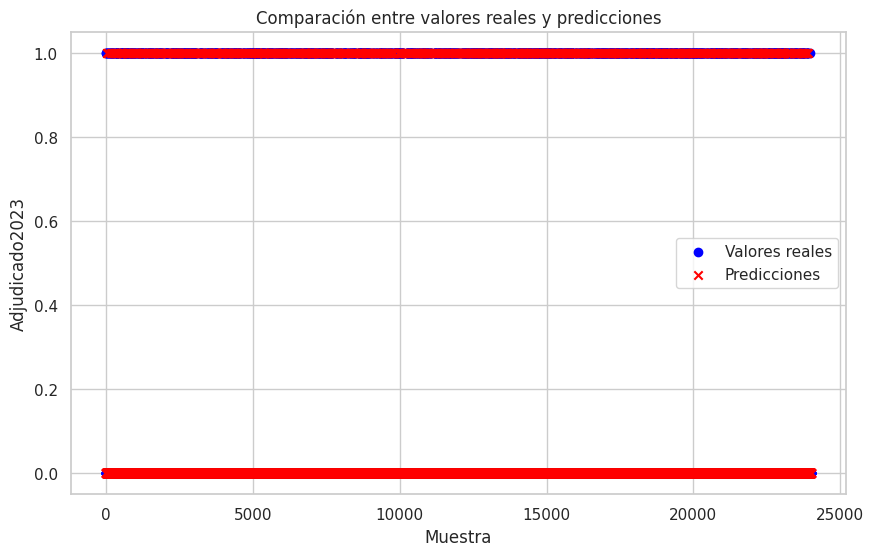

In [308]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya has realizado el entrenamiento del modelo y la predicción
# Aquí se asume que 'y_pred' contiene las predicciones y 'y' contiene los valores reales

# Graficar los resultados de la predicción versus los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Valores reales')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', marker='x', label='Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Muestra')
plt.ylabel('Adjudicado2023')
plt.legend()
plt.show()

Ahora creamos esta variable para poder terminar las conclusiones finales teniendo la predicción en nuestros datos originales

---



In [321]:
final = pd.merge(backup_data, pro[['RAZON_SOCIAL', 'Prediccion_Adjudicado2024']], on='RAZON_SOCIAL', how='left')

In [318]:
final.head()

,RAZON_SOCIAL,GENERO,TIPO_PERSONA,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,MACROREGION,Adjudicado2023,AdjudicadoUltimos5anios,Prediccion_Adjudicado2024
0,CAMARA MINERA DEL PERU,Femenino,Persona Jurídica,Activo,No clasificada,No,No Especificada,0,0,0
1,"KAPLAN, INC",Masculino,Persona Jurídica,Activo,No clasificada,No,No Especificada,0,0,0
2,MR DO BRASIL INDUSTRIA MECANICA LTDA,Masculino,Persona Jurídica,Desactualizado,No clasificada,No,No Especificada,0,0,0
3,CESAR MIGUEL VASQUEZ CAMACHO,Masculino,Persona Natural,Activo,Micro empresa,Si,SURESTE,0,0,0
4,"SUPMACON 4G, SRL",Masculino,Persona Jurídica,Desactualizado,Pequeña empresa,Si,SURESTE,0,0,0


In [323]:
finalpro  = final[final['Prediccion_Adjudicado2024'] == 1]

In [325]:
finalpro.head()

,RAZON_SOCIAL,GENERO,TIPO_PERSONA,ESTADO_RPE,CLASIFICACION_RPE,ES_MIPYME,MACROREGION,Adjudicado2023,AdjudicadoUltimos5anios,Prediccion_Adjudicado2024
16,"P.A. Catering, SRL",Masculino,Persona Jurídica,Activo,Pequeña empresa,Si,SURESTE,1,1,1
45,"Rey Publicidad, SRL",Masculino,Persona Jurídica,Activo,Pequeña empresa,Si,SURESTE,1,1,1
47,"Panaderia Reposteria de los Santos, SRL",Masculino,Persona Jurídica,Activo,Pequeña empresa,Si,SURESTE,0,1,1
56,"Luis Cáceres & Asoc. Lucaas, SRL",Masculino,Persona Jurídica,Activo,Pequeña empresa,Si,No Especificada,0,1,1
60,"Nuovopharma Dominicana, SRL",Masculino,Persona Jurídica,Activo,Mediana empresa,Si,SURESTE,1,1,1


In [330]:
MIPYME = finalpro['ES_MIPYME'].value_counts()
print(MIPYME)

ES_MIPYME
Si    4957
No      20
Name: count, dtype: int64


In [327]:
GENERO = finalpro['GENERO'].value_counts()
print(GENERO)

GENERO
Masculino    3244
Femenino     1733
Name: count, dtype: int64


# Conclusiones

---





*   El número de unidades de compra ha disminuido desde el 2022 después de haber estado en continuo crecimiento pero cada una de esas unidades de compra cada vez adquiere mas bienes , servicios y obras.

*   La cantidad de MIPYMES va en aumento gracias a los incentivos creados para esa función.

*   Los bienes y servicios son muy superiores en cuanto a demanda por el general de las unidades de compra.

*   Las macroregiones Norte y Sureste son las que mas peso tienen en cuanto a la demanda.

*   URBE , INABIE , EMBELLECIMIENTO , INAIPI y AMN son las unidades de compra que más capital gastan en bienes y servicios desde el 2018.


*   La predición de este modelo indica que de la lista actual de proveedores reincidirán en brindar bienes , servicios u obras 4,977 en total

*   De estos 4,977 20 serán MIPYMES 4,957 por lo tanto nos situamos en un
 99.59% de tasa MIPYMES , indicando que nuestro análisis anterior de la tendencia en alza por los incentivos a estas compañías era correcto.


*   Hay que seguir realizando políticas que involucren más al sector mujeres ya que aunque el 35% esta bien ya que demuestra progesividad respecto al tiempo , el objetivo primordial es que esté totalmente balanceado










# Comparto aqui en enlace al PowerBi para ver las estadísticas mas relevantes de las UOCC

---



https://app.powerbi.com/groups/me/reports/5272ec17-1402-4104-8275-d2cc78aefa60/cfb709b2b0f0c7637d13?experience=power-bi